In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-youtube-most-viewed-top600/top_600_youtube_videos_2023.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
#reading the csv data using pandas
data=pd.read_csv('/kaggle/input/2023-youtube-most-viewed-top600/top_600_youtube_videos_2023.csv')

In [4]:
#checking the columns in the data
data.columns

Index(['title', 'published_at', 'duration', 'view_count', 'like_count',
       'comment_count'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          601 non-null    object 
 1   published_at   601 non-null    object 
 2   duration       601 non-null    object 
 3   view_count     601 non-null    int64  
 4   like_count     598 non-null    float64
 5   comment_count  590 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.3+ KB


In [6]:
data.isnull().any()

title            False
published_at     False
duration         False
view_count       False
like_count        True
comment_count     True
dtype: bool

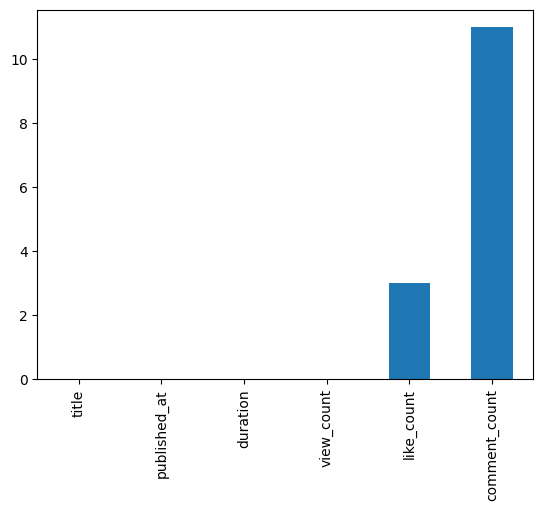

In [7]:
#using visualization to identify the null values in the data
data.isna().sum().plot(kind='bar')
fig = px.bar(data.isna().sum(), text=data.isna().sum(), labels={'value':'No of null values', 'index': 'columns'})
fig.update_layout(xaxis_title='Columns', yaxis_title='Number of Null values', title='Number of null values in each column', width=500, height=400)
plt.show()
fig.show()

In [8]:
data[data['like_count'].isnull()]


,title,published_at,duration,view_count,like_count,comment_count
21,Puzzle slow ❤💯 #shorts #satisfying,2023-05-16T02:32:40Z,PT16S,26635375,NaN,842.0
45,बेजुबा की क्या गलती | #shorts #emotional #kaha...,2023-01-09T10:44:28Z,PT45S,9715596,NaN,0.0
80,otilia - jaanu jaanu | Dee pete remix || #arab...,2023-05-24T15:27:00Z,PT4S,3745271,NaN,940.0


In [9]:
data[data.isnull().any(axis=1)]
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 0 to 600
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          587 non-null    object 
 1   published_at   587 non-null    object 
 2   duration       587 non-null    object 
 3   view_count     587 non-null    int64  
 4   like_count     587 non-null    float64
 5   comment_count  587 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 32.1+ KB


<Axes: >

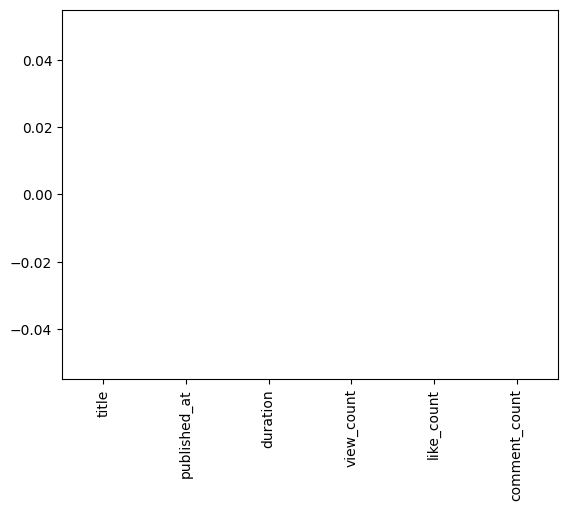

In [10]:
#identifying the null values count using barplot
data.isna().sum().plot(kind='bar')

In [11]:
data.columns

Index(['title', 'published_at', 'duration', 'view_count', 'like_count',
       'comment_count'],
      dtype='object')

In [12]:
#descriptive analysis
data.describe()

,view_count,like_count,comment_count
count,5.870000e+02,5.870000e+02,587.000000
mean,3.785001e+06,8.318945e+04,530.131175
std,1.565213e+07,2.904621e+05,1631.618792
min,8.952600e+04,1.000000e+00,0.000000
25%,2.579470e+05,3.120500e+03,34.000000
50%,5.176310e+05,8.229000e+03,94.000000
75%,1.044110e+06,2.887250e+04,492.000000
max,2.462006e+08,2.764756e+06,28560.000000


In [13]:
#Finding the video title with maximum like count
max_views_index = data['view_count'].idxmax()

# Getting the data for the movie with the highest views
movie_with_highest_views = data.loc[max_views_index]
movie_with_highest_views

title            Let's see if you dare next time #Shorts #017
published_at                             2023-04-25T02:40:11Z
duration                                                PT18S
view_count                                          246200629
like_count                                          1572774.0
comment_count                                           942.0
Name: 0, dtype: object

In [14]:
#Finding the video title with minimum like count
min_view_index=data['view_count'].idxmin()
video_with_lowest_views= data.loc[min_view_index]
video_with_lowest_views

title            [2023년 12월 11일 월요일 오전 8시 생방송] 김기현 거취 결단 요구 봇물
published_at                              2023-12-11T02:02:57Z
duration                                            PT2H56M59S
view_count                                               89526
like_count                                             15254.0
comment_count                                            152.0
Name: 599, dtype: object

In [15]:
#Finding the video title with maximum and minimum like count
min_like_count=data['like_count'].idxmin()
max_like_count=data['like_count'].idxmin()
video_with_max_likes=data.loc[max_like_count]
video_with_min_likes=data.loc[min_like_count]
print(f"The moview with maximum and minimum likes \n{video_with_max_likes} \n{video_with_min_likes}")

The moview with maximum and minimum likes 
title            Gippsland Jersey. Your Local Milk
published_at                  2023-04-26T03:52:45Z
duration                                     PT31S
view_count                                  489197
like_count                                     1.0
comment_count                                  0.0
Name: 319, dtype: object 
title            Gippsland Jersey. Your Local Milk
published_at                  2023-04-26T03:52:45Z
duration                                     PT31S
view_count                                  489197
like_count                                     1.0
comment_count                                  0.0
Name: 319, dtype: object


In [16]:
#sort values by view_count
data.head().sort_values(by='view_count',ascending=False)

,title,published_at,duration,view_count,like_count,comment_count
0,Let's see if you dare next time #Shorts #017,2023-04-25T02:40:11Z,PT18S,246200629,1572774.0,942.0
1,[6번] 식당 업소용 음식포장 비닐랩 절단기,2023-05-11T07:08:02Z,PT15S,160984366,1472323.0,678.0
2,Khaby Lame react epic moments #shorts #kabhylame,2023-05-12T09:35:22Z,PT19S,96455747,2312319.0,2203.0
3,Polina Knoroz's Cute Moment in Sports #shorts,2023-06-11T13:30:04Z,PT35S,91902366,1397067.0,930.0
4,Salute to indian army🇮🇳❤️💯 #army #trending #vi...,2023-05-05T14:00:16Z,PT30S,85157682,1973374.0,0.0


In [17]:
#Converting 'published_at' to date_time format
data['published_at']=pd.to_datetime(data['published_at'])
data['published_at']

0     2023-04-25 02:40:11+00:00
1     2023-05-11 07:08:02+00:00
2     2023-05-12 09:35:22+00:00
3     2023-06-11 13:30:04+00:00
4     2023-05-05 14:00:16+00:00
                 ...           
596   2023-12-10 17:30:06+00:00
597   2023-12-10 17:00:20+00:00
598   2023-12-11 02:11:28+00:00
599   2023-12-11 02:02:57+00:00
600   2023-12-11 14:07:24+00:00
Name: published_at, Length: 587, dtype: datetime64[ns, UTC]

In [18]:
# Converting 'published_at' to just the date for easier analysis
data['published_date'] = data['published_at'].dt.date
data['published_date']

0      2023-04-25
1      2023-05-11
2      2023-05-12
3      2023-06-11
4      2023-05-05
          ...    
596    2023-12-10
597    2023-12-10
598    2023-12-11
599    2023-12-11
600    2023-12-11
Name: published_date, Length: 587, dtype: object

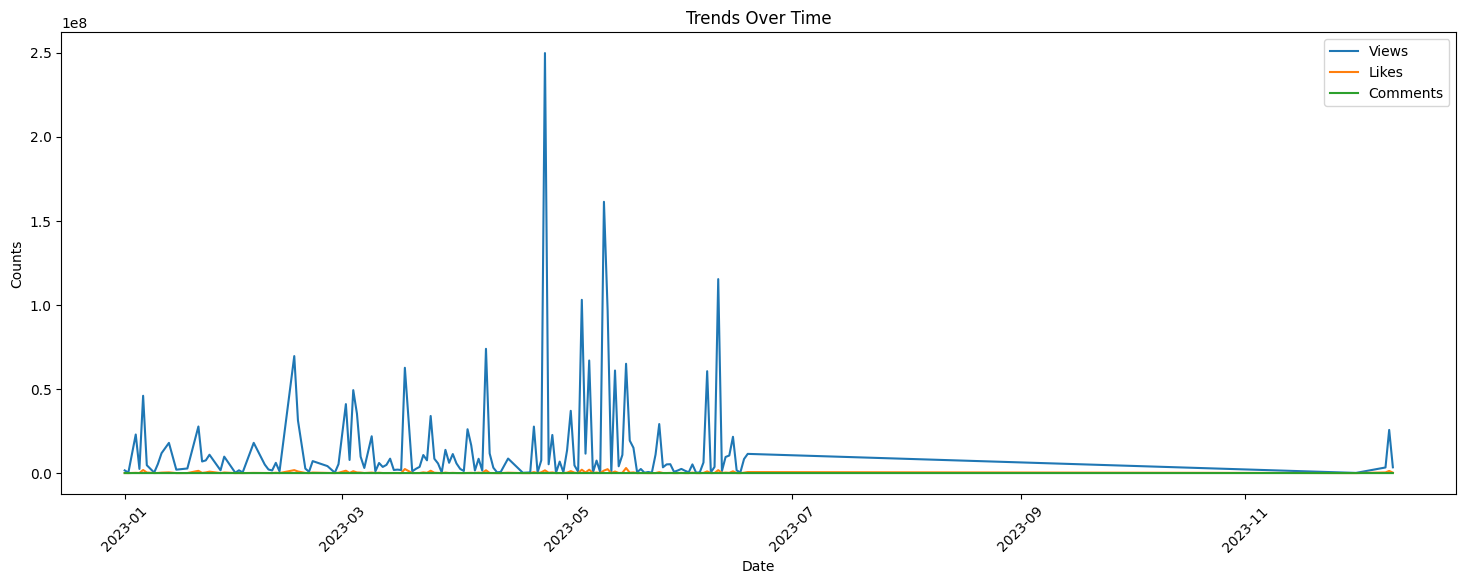

In [19]:
# Grouping data by publish date and finding the trends in views, likes and comment counts
date_group = data.groupby('published_date')[['view_count', 'like_count', 'comment_count']].sum()

# Plotting trends over time
plt.figure(figsize=(18, 6))
plt.plot(date_group.index, date_group['view_count'], label='Views')
plt.plot(date_group.index, date_group['like_count'], label='Likes')
plt.plot(date_group.index, date_group['comment_count'], label='Comments')
plt.title('Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.xticks(rotation=45)
plt.show()

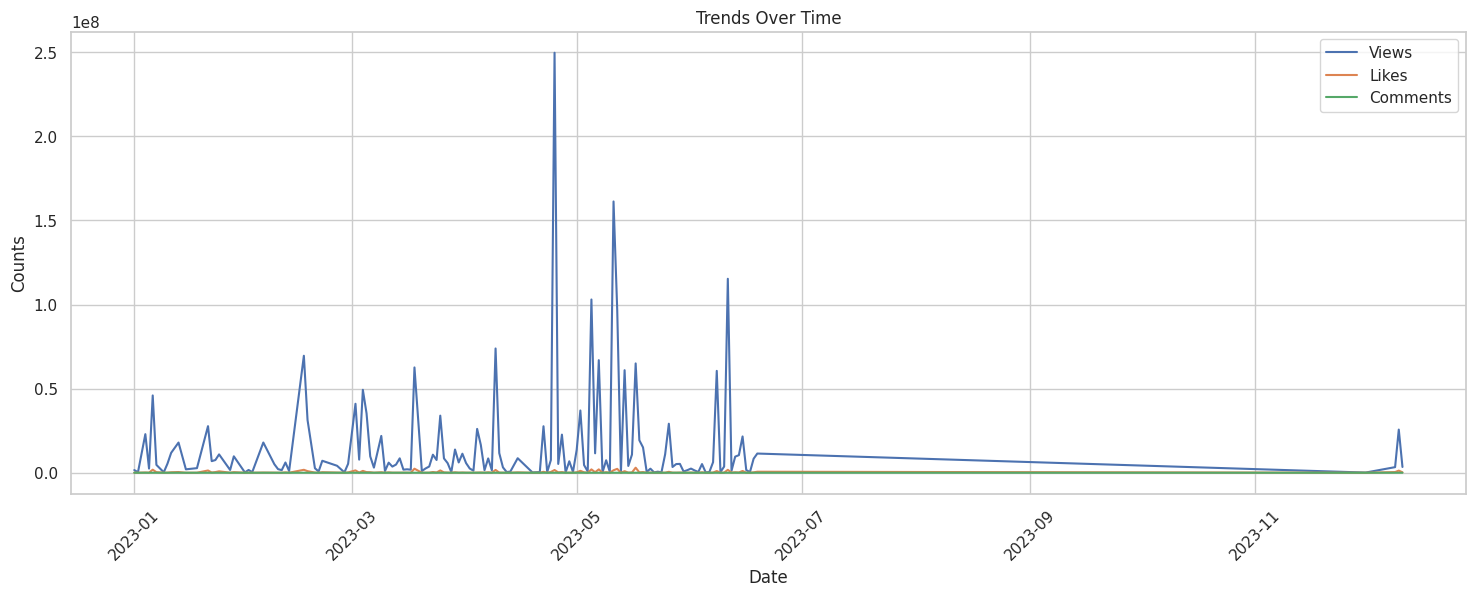

In [20]:
# Setting the Seaborn style as whitegrid
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
# Using Seaborn's lineplot to plot trends over time
sns.lineplot(x='published_date', y='view_count', data=date_group, label='Views')
sns.lineplot(x='published_date', y='like_count', data=date_group, label='Likes')
sns.lineplot(x='published_date', y='comment_count', data=date_group, label='Comments')
ax=plt.gca()
ax.set_title('Trends Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

In [21]:
# Top Videos by Views
top_views = data.nlargest(10, 'view_count')
print("Top 10 Videos by Views:")
print(top_views[['published_date','title', 'view_count']])

# Top Videos by Likes
top_likes = data.nlargest(10, 'like_count')
print("\nTop 10 Videos by Likes:")
print(top_likes[['published_date','title', 'like_count']])

# Top Videos by Comments
top_comments = data.nlargest(10, 'comment_count')
print("\nTop 10 Videos by Comments:")
print(top_comments[['published_date','title', 'comment_count']])
for index, row in top_comments.iterrows():
    print(f"{row['published_date']} - {row['title']} (Comments: {row['comment_count']})", end=' | ')

Top 10 Videos by Views:
  published_date                                              title  \
0     2023-04-25       Let's see if you dare next time #Shorts #017   
1     2023-05-11                           [6번] 식당 업소용 음식포장 비닐랩 절단기   
2     2023-05-12   Khaby Lame react epic moments #shorts #kabhylame   
3     2023-06-11      Polina Knoroz's Cute Moment in Sports #shorts   
4     2023-05-05  Salute to indian army🇮🇳❤️💯 #army #trending #vi...   
5     2023-04-09  #طفل فقير يريد ان يشتري الموز من البائع ولكن ل...   
6     2023-02-16   Khaby Lame react epic moments #shorts #kabhylame   
7     2023-03-18                       Happiness ❤️ | Wild Cookbook   
8     2023-05-17                       MOST SATISFYIGN world RECORD   
9     2023-06-08  Cute baby enjoying in slide 🛝 #viral #shorts #...   

   view_count  
0   246200629  
1   160984366  
2    96455747  
3    91902366  
4    85157682  
5    72179884  
6    68627526  
7    61273357  
8    56268598  
9    55649728  

Top 10 Videos by 

In [22]:
data['weekday'] = data['published_at'].dt.weekday
data['weekday']
data['weekday_name']=data['published_at'].dt.strftime('%A')
data['weekday_name']

0       Tuesday
1      Thursday
2        Friday
3        Sunday
4        Friday
         ...   
596      Sunday
597      Sunday
598      Monday
599      Monday
600      Monday
Name: weekday_name, Length: 587, dtype: object

In [23]:
weekday_trend_video=data.groupby('weekday_name')[['view_count','like_count','comment_count']].agg(np.mean).reset_index()
weekday_trend_video

,weekday_name,view_count,like_count,comment_count
0,Friday,5.338933e+06,127639.291667,431.555556
1,Monday,1.314302e+06,40817.652174,569.666667
2,Saturday,3.232428e+06,106486.813953,509.058140
3,Sunday,3.147497e+06,65338.978873,589.218310
4,Thursday,5.327854e+06,97374.209302,760.348837
5,Tuesday,5.053109e+06,68080.753247,290.012987
6,Wednesday,3.172498e+06,86788.345455,466.163636


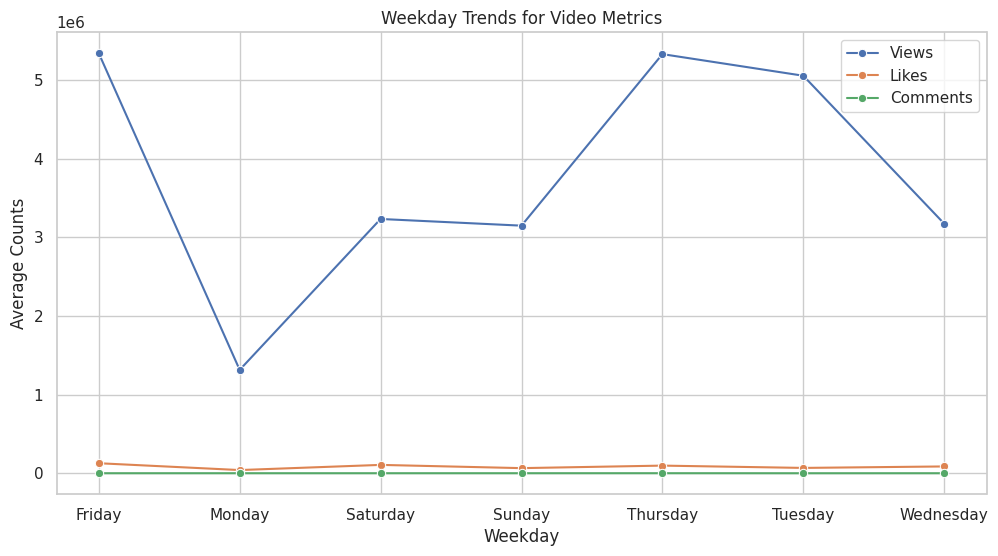

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday_name', y='view_count', data=weekday_trend_video, label='Views', marker='o')
sns.lineplot(x='weekday_name', y='like_count', data=weekday_trend_video, label='Likes', marker='o')
sns.lineplot(x='weekday_name', y='comment_count', data=weekday_trend_video, label='Comments', marker='o')

# Adding title and labels
plt.title('Weekday Trends for Video Metrics')
plt.xlabel('Weekday')
plt.ylabel('Average Counts')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

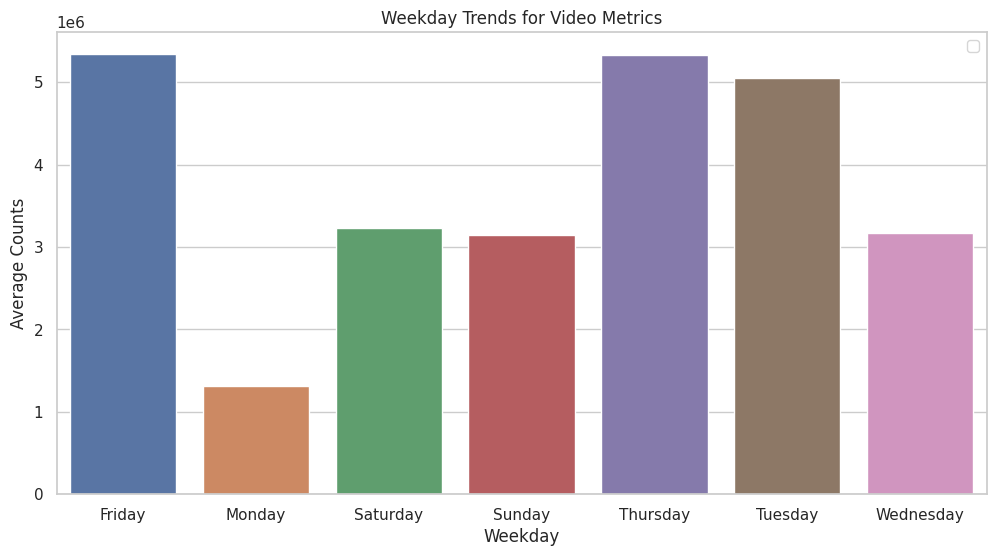

In [25]:
# Plotting trends using Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_name', y='view_count', data=weekday_trend_video)
# Adding title and labels
plt.title('Weekday Trends for Video Metrics')
plt.xlabel('Weekday')
plt.ylabel('Average Counts')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

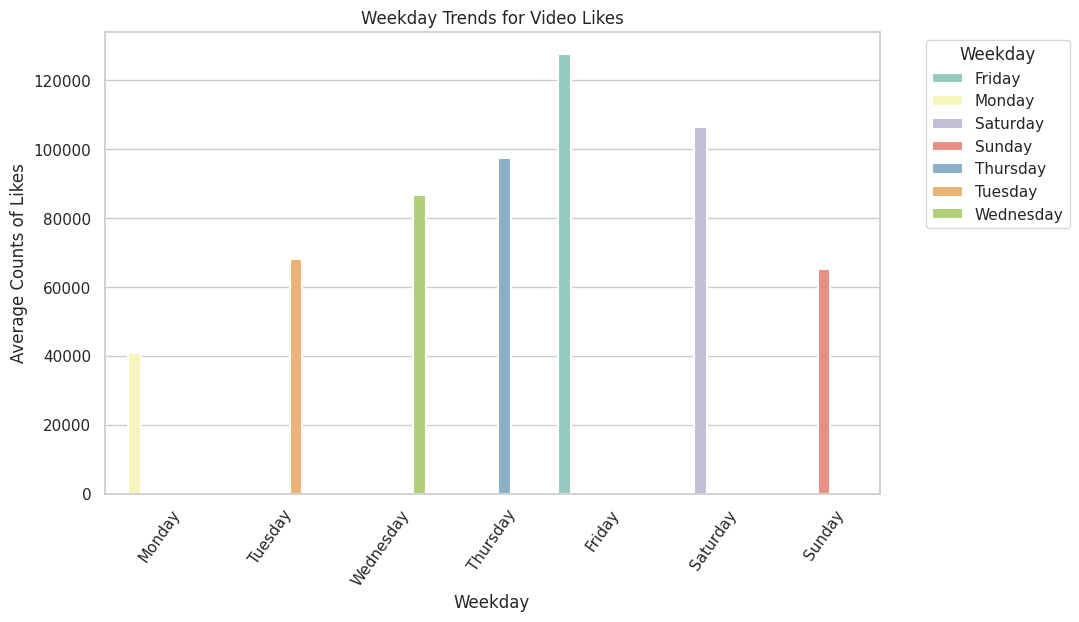

In [26]:
weekday_trend_video
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,6))
sns.barplot(x='weekday_name', y='like_count', data=weekday_trend_video , hue='weekday_name' , order=weekday_order,linewidth=1.5, palette='Set3')
plt.xticks(rotation=55)
plt.title('Weekday Trends for Video Likes')
plt.xlabel('Weekday')
plt.ylabel('Average Counts of Likes')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()